# The Electron-Positron EOS

The {py:obj}`ElectronEOS <pynucastro.eos.electron_eos.ElectronEOS>` class managed an electron-positron equation of state, including the effects of relativity and degeneracy.  It does this by directly computing the necessary Fermi-Dirac integrals.

```{warning}
The `ElectronEOS` can be slow because it is solving for the degeneracy parameter,
$\eta$, and doing all of the integrals at high precision.
```

Here we'll explore the degeneracy parameter, $\eta = (\mu - m_e c^2)/ (kT)$, where
$\mu$ is the chemical potential, as well as positron creation at low densities and high temperature.

In [1]:
import pynucastro as pyna

In [2]:
import numpy as np

Once we create an `ElectronEOS`, we can access the thermodynamics via the
{py:func}`pe_state <pynucastro.eos.electron_eos.ElectronEOS.pe_state>` function.

In [4]:
eos = pyna.eos.ElectronEOS()

We'll create a grid of temperature and density and compute the thermodynamic quantities at each point.

In [5]:
Ts = np.logspace(4, 9, 26)
rhos = np.logspace(-4, 9, 66)

In [6]:
eta = np.zeros((len(rhos), len(Ts)))
n_e = np.zeros((len(rhos), len(Ts)))
n_pos = np.zeros((len(rhos), len(Ts)))

The only role composition plays in this EOS is determining the number density
of electrons (assuming full ionization) via $Y_e$.

In [7]:
comp = pyna.Composition(["he4"])
comp.set_equal()

The `pe_state()` function returns two {py:obj}`EOSState <pynucastro.eos.stellar_eos.EOSState>` objects---one for electrons and the other for positrons.

In [8]:
for ir, rho in enumerate(rhos):
    for it, T in enumerate(Ts):
        es, ps = eos.pe_state(rho, T, comp, compute_derivs=False)
        eta[ir, it] = es.eta
        n_e[ir, it] = es.n
        n_pos[ir, it] = ps.n

Now we'll make some plots

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors

## Degeneracy parameter

First, the degeneracy parameter.  Since our grid of EOS points was coarse, we'll use 
some interpolation to smooth it.

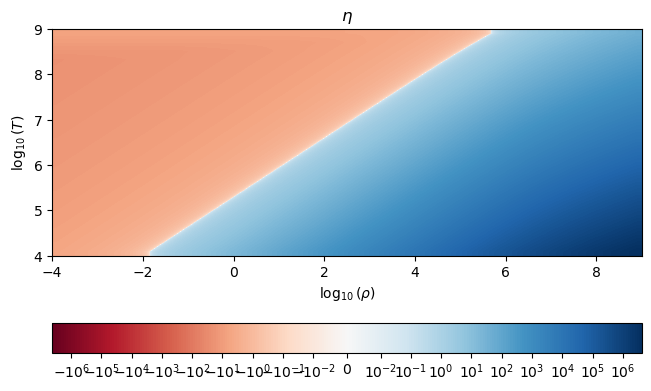

In [10]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(eta.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=0.01, vmin=-eta.max(), vmax=eta.max()),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear",
               cmap="RdBu")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$\eta$")
fig.colorbar(im, ax=ax, orientation="horizontal")

We see that at high temperatures, low densities, we are an idea gas ($\eta \ll -1$),
while at high densities and low temperatures, we are very degenerate ($\eta \gg 1$)

## Electron-positron pairs

At low density and very high temperatures ($kT \sim m_e c^2$), we can create electron positron pairs.  Here we plot the fraction of positrons to the total number of electrons and positrons.

In [11]:
y = (n_pos / (n_pos + n_e))
y.min(), y.max()

(np.float64(0.0), np.float64(0.499999986135348))

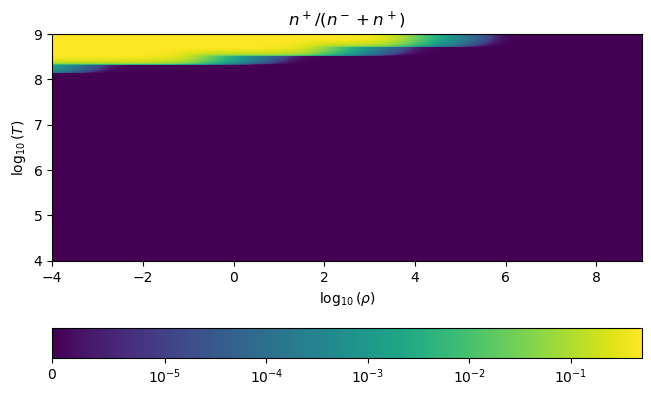

In [12]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(y.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=1.e-5, vmin=1.e-50, vmax=0.5, clip=True),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$n^+ / (n^- + n^+)$")
fig.colorbar(im, ax=ax, orientation="horizontal")

We see that we have nearly equal numbers of electrons and positrons at very low densities and high temperatures.